<h1>Modelo de regressão linear para previsão do consumo de cerveja na cidade de São Paulo</h1>

## Conhecendo o dataset
<hr>

### Fonte: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

### Descrição:
<p style='line-height: 1.5; text-align: justify;'>A cerveja é uma das bebidas mais democráticas e consumidas no mundo. Não sem razão, é perfeito para quase todas as situações, desde o happy hour até grandes festas de casamento.</p>

<p style='line-height: 1.5; text-align: justify;'>O objetivo deste treinamento será estimar um modelo de <b>Machine Learning</b> utilizando a técnica de <b>Regressão Linear</b> para demonstrar os impactos das variáveis disponibilizadas neste dataset sobre o consumo de cerveja (Y). No final do projeto teremos um modelo de previsão para o consumo médio de cerveja segundo os inputs de um conjunto de variáveis (X's).</p>

<p style='line-height: 1.5; text-align: justify;'>Os dados (amostra) foram coletados em São Paulo - Brasil, em uma área universitária, onde existem algumas festas com grupos de alunos de 18 a 28 anos de idade (média).</p>

### Dados:
<ul style='line-height: 1.5; text-align: justify;'>
    <li><b>data</b> - Data</li>
    <li><b>temp_media</b> - Temperatura Média (°C)</li>
    <li><b>temp_min</b> - Temperatura Mínima (°C)</li>
    <li><b>temp_max</b> - Temperatura Máxima (°C)</li>
    <li><b>chuva</b> - Precipitação (mm)</li>
    <li><b>fds</b> - Final de Semana (1 = Sim; 0 = Não)</li>
    <li><b>consumo</b> - Consumo de Cerveja (litros)</li>
</ul>

### Importando bibliotecas

In [157]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

import pickle

import warnings
warnings.filterwarnings('ignore')

# Configurando a biblioteca seaborn
sns.set_palette('Blues_r')
sns.set_style('darkgrid')

### Leitura dos dados

In [2]:
dados = pd.read_csv('Consumo_cerveja.csv', sep=';')

### Visualizar os dados

In [3]:
dados.head()

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900


### Verificando o tamanho do dataset

In [4]:
dados.shape

(365, 7)

## Análise Exploratória</font>
<hr style='border: 2px solie;'>

### Estatísticas descritivas

In [5]:
dados.describe().round(2)

,temp_media,temp_min,temp_max,chuva,fds,consumo
count,365.00,365.00,365.00,365.00,365.00,365.00
mean,21.23,17.46,26.61,5.20,0.28,25401.37
std,3.18,2.83,4.32,12.42,0.45,4399.14
min,12.90,10.60,14.50,0.00,0.00,14343.00
25%,19.02,15.30,23.80,0.00,0.00,22008.00
50%,21.38,17.90,26.90,0.00,0.00,24867.00
75%,23.28,19.60,29.40,3.20,1.00,28631.00
max,28.86,24.50,36.50,94.80,1.00,37937.00


### Matriz de correlação

<p>O <b>coeficiente de correlação</b> é uma medida de associação linear entre duas variáveis e situa-se entre <b>-1</b> e <b>+1</b> sendo que <b>-1</b> indica associação negativa perfeita e <b>+1</b> indica associação positiva perfeita.</p>

<Axes: >

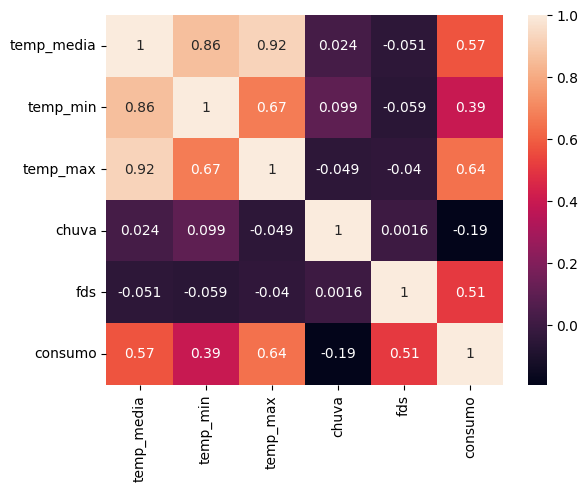

In [16]:
sns.heatmap(dados.drop('data', axis=1).corr().round(4), annot=True)

As variáveis que apresentam maior correlação com a variável target(consumo) são as variáveis temp_max, temp_media e fds.

Nota-se também que as variáveis temp_max, temp_min e temp_media apresentam fortes correlações entre si. Isso pode ser prejudicial ao modelo, pois pode enviesar o modelo. Analisaremos isso de forma gráfica posteriormente

### Plotando a variável target

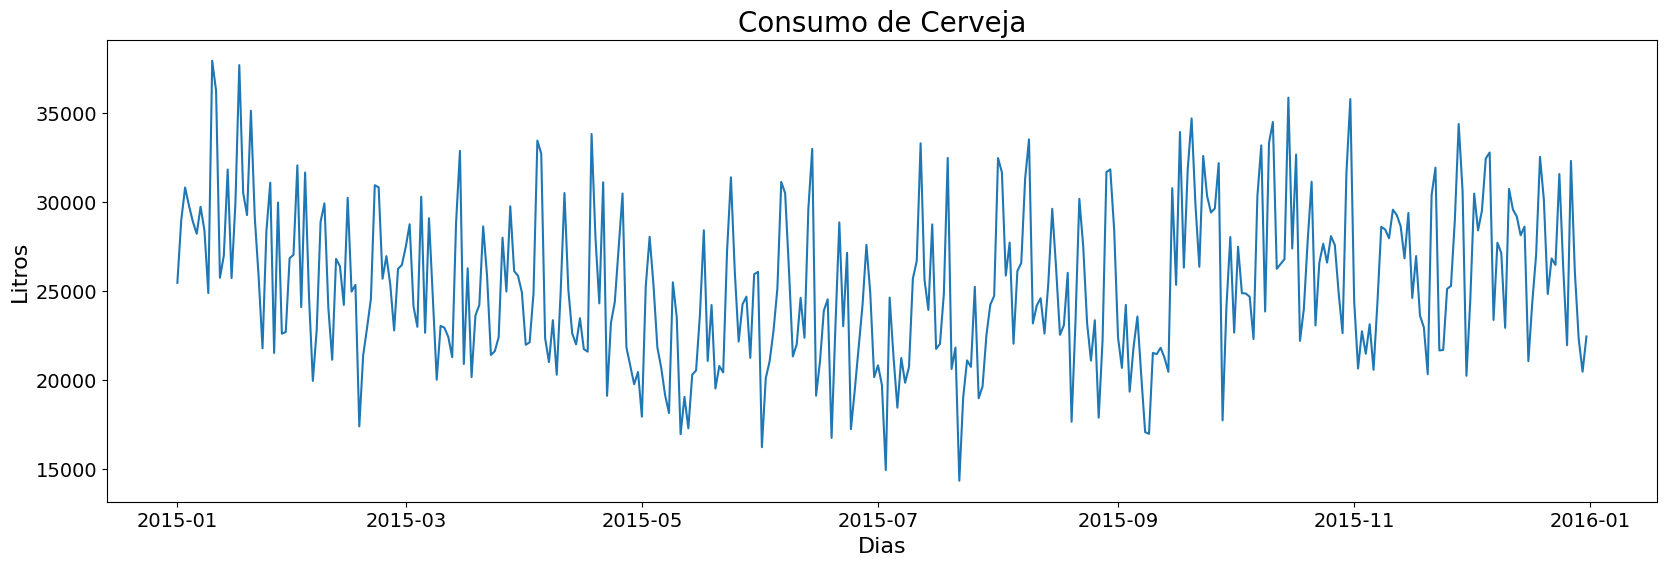

In [29]:
fig, ax = plt.subplots(figsize=(20,6))

ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_xlabel('Dias', fontsize=16)
ax.set_ylabel('Litros', fontsize=16)
ax.tick_params(axis='both', labelsize=14)
ax = plt.plot(pd.to_datetime(dados['data'], dayfirst=True), dados['consumo'])

### Box Plot da variável target

<Axes: title={'center': 'Consumo de cerveja'}, ylabel='Litros'>

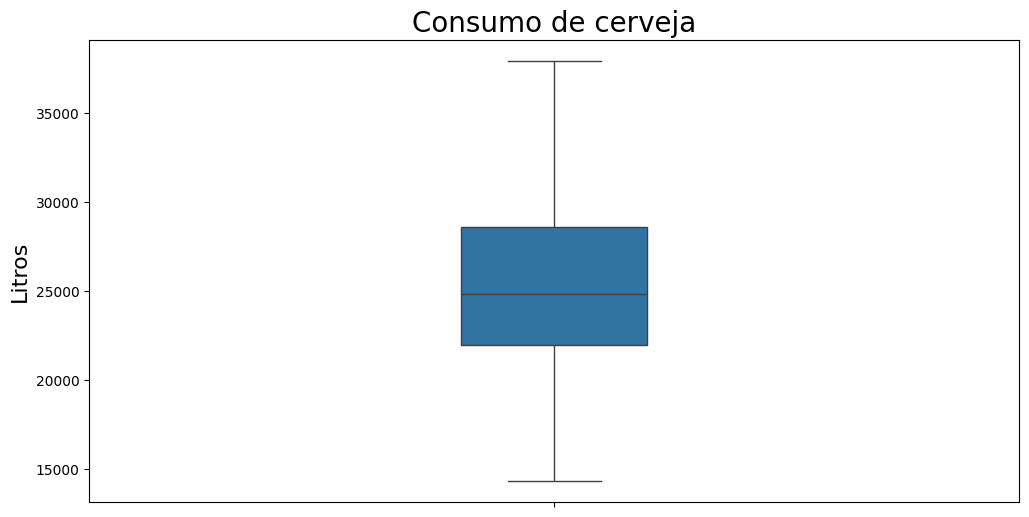

In [38]:
_,ax = plt.subplots(figsize=(12,6))
ax = sns.boxplot(data=dados['consumo'], orient='v', width=0.2)
ax.set_title('Consumo de cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax

### Boxplot da variável target com a variável fds

<Axes: title={'center': 'Consumo de Cerveja'}, xlabel='Final de semana', ylabel='Litros'>

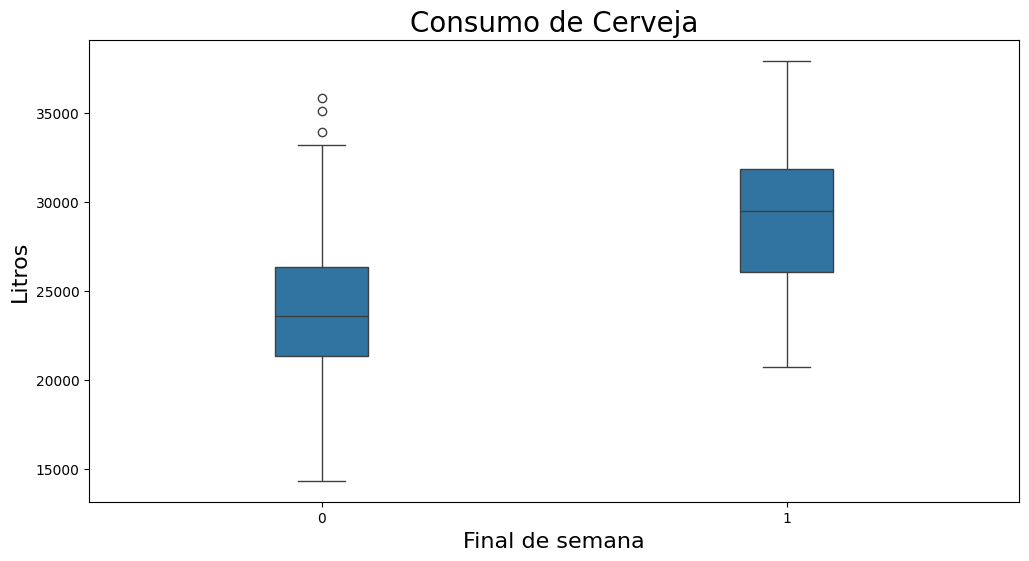

In [39]:
_,ax = plt.subplots(figsize=(12,6))

ax = sns.boxplot(x='fds', y='consumo', data=dados, orient='v', width=0.2)
ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_xlabel('Final de semana', fontsize=16)
ax.set_ylabel('Litros', fontsize=16)
ax

É possível notar que, aos fins de semana, o consumo tende a aumentar. Isso é totalmente compreensivel, visto que aos fins de semana as pessoas têm folgas de seus trabalhos e normalmente consomem mais. 

### Distribuição de frequências da variável target

<Axes: title={'center': 'Distribuição de Frequências'}, xlabel='Consumo de cerveja (Litros)', ylabel='Dias'>

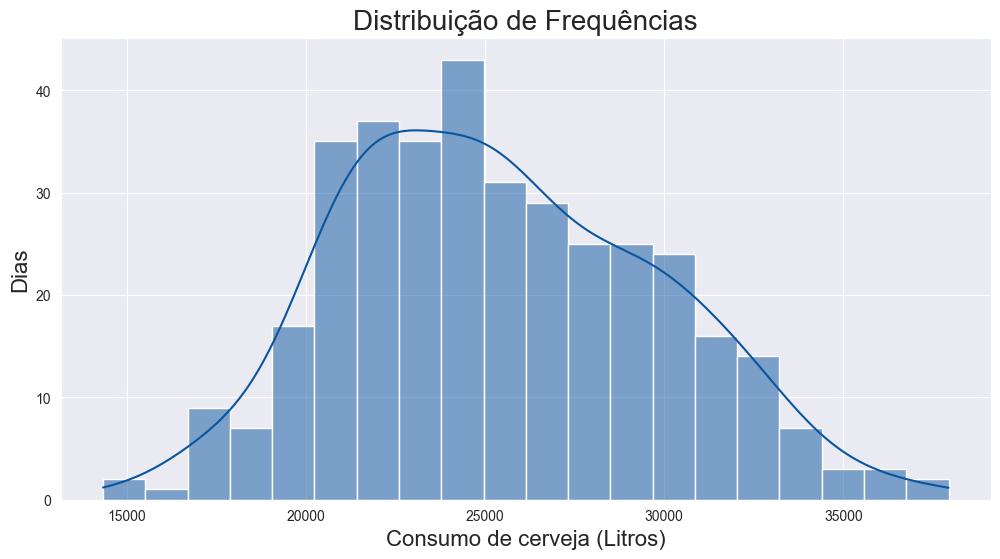

In [45]:
_,ax = plt.subplots(figsize=(12,6))
ax= sns.histplot(dados['consumo'], bins=20, kde=True)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_xlabel('Consumo de cerveja (Litros)', fontsize=16)
ax.set_ylabel('Dias', fontsize=16)
ax

Nota-se que a variável target não apresenta uma distribuição normal, mas sim uma distribuição assimétrica à direita

### Gráficos de dispersão entre as variáveis do dataset

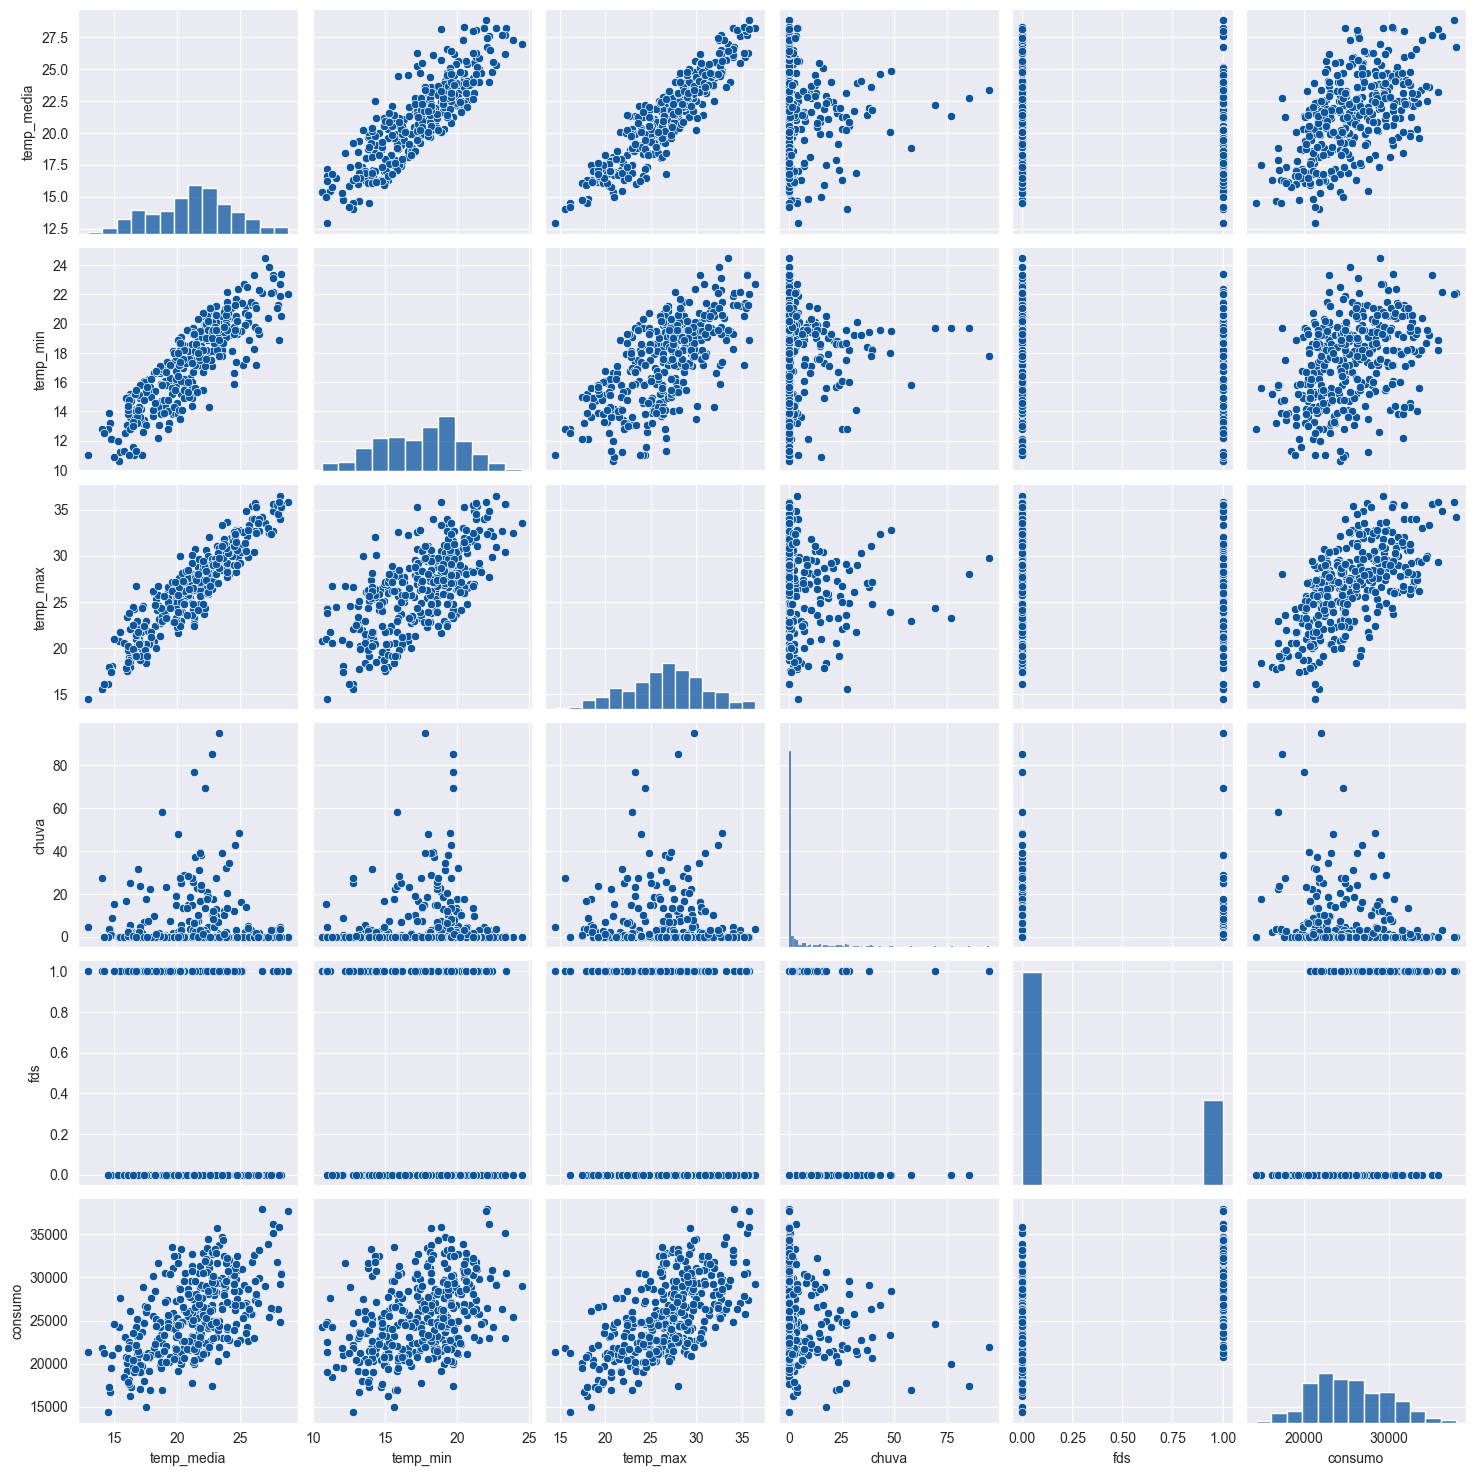

In [47]:
ax = sns.pairplot(dados)

Como haviamos mencionado anteriormente, nota-se que as variáveis temp_max, temp_min e temp_media apresentam fortes correlações entre si. Em virtude disso, para que essa interação não enviese o nosso modelo, iremos utilizar apenas as variáveis temp_max, chuva e fds.

### Plotando os gráficos de correlação entre as variáveis somente com a vaariável target

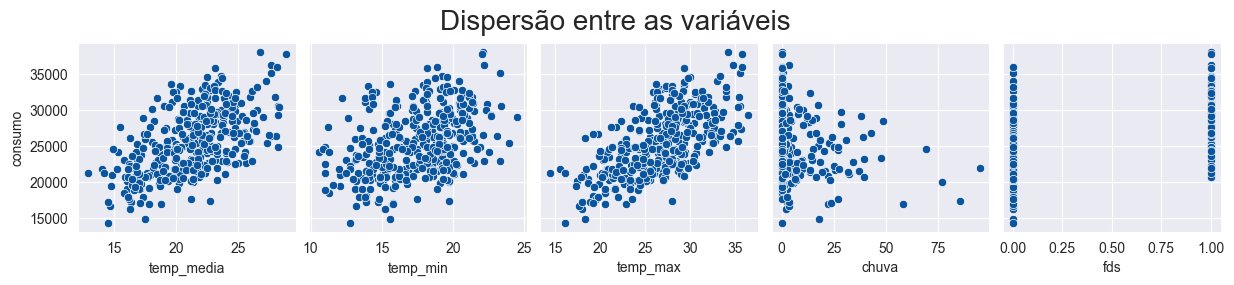

In [55]:
ax= sns.pairplot(dados, y_vars='consumo', x_vars=dados.columns[1:-1])
ax.fig.suptitle('Dispersão entre as variáveis', fontsize=20, y=1.1)
ax

Nota-se correlação da variável target com todas as variáveis explicativas.

Para melhorar a compreensão, vamos plotar abaixo a regressão entre as variáveis.

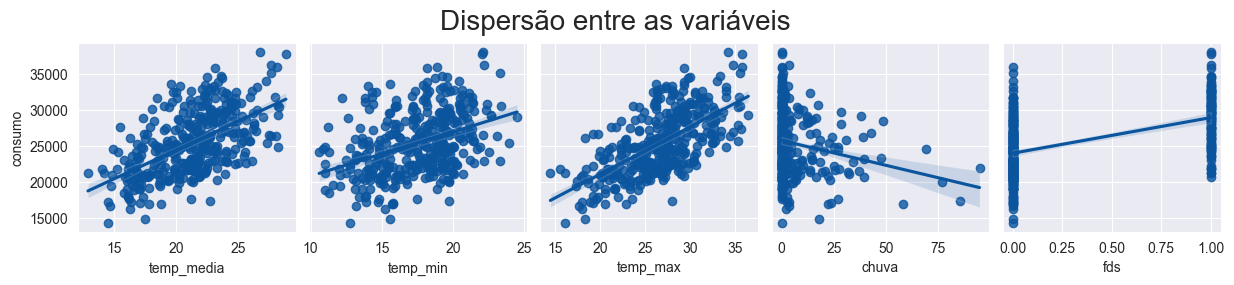

In [58]:
ax= sns.pairplot(dados, y_vars='consumo', x_vars=dados.columns[1:-1], kind='reg')
ax.fig.suptitle('Dispersão entre as variáveis', fontsize=20, y=1.1)
ax

Agora é possível observar melhor as correlações.

### Variável target X features

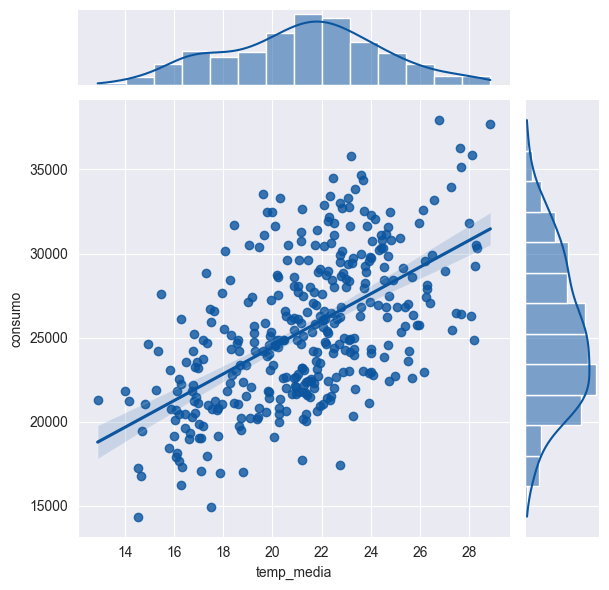

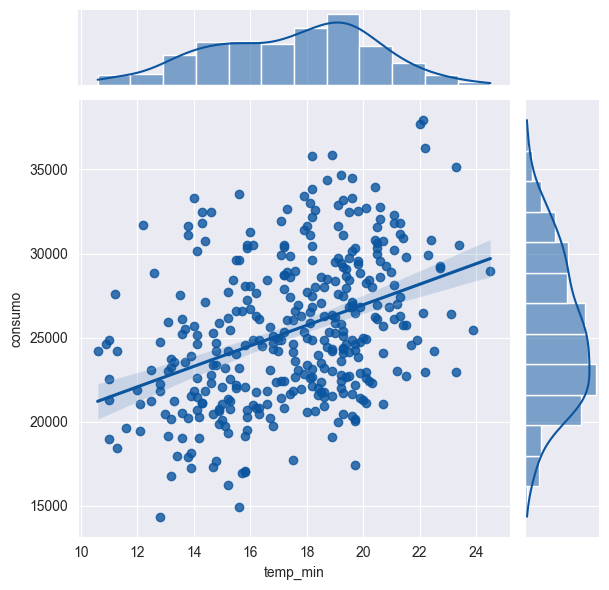

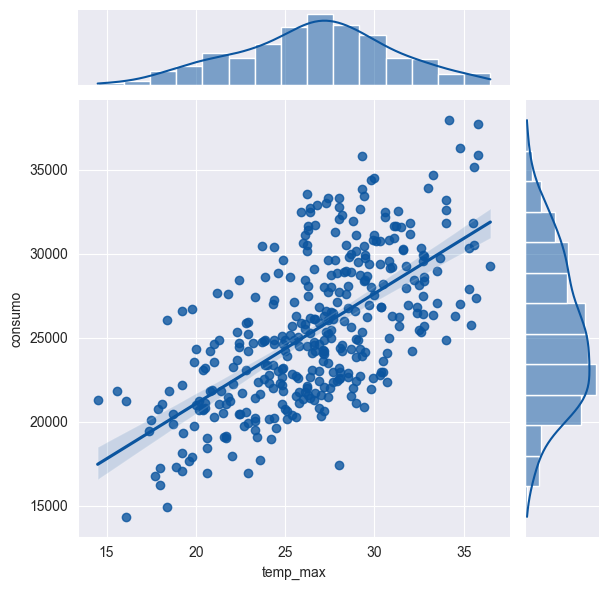

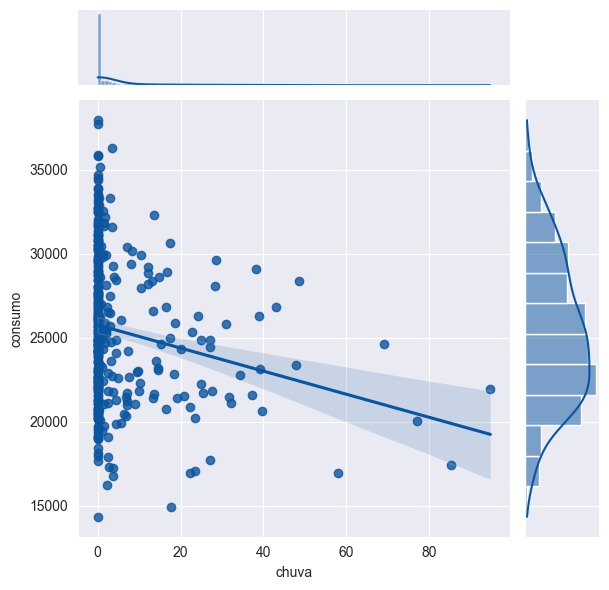

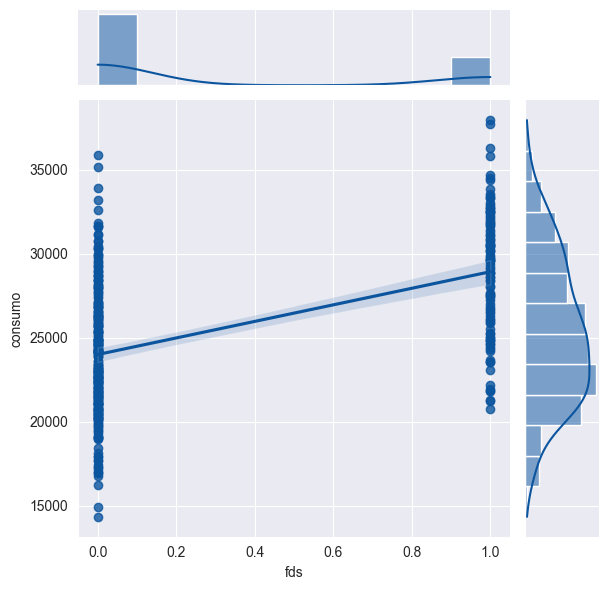

In [77]:
# Consumo X Temperatúra máxima

line = 0
col = 0

for i in dados.columns[1:-1]:
    axes = sns.jointplot(x=i, y='consumo', data=dados, kind='reg')
    #axes.fig.suptitle('Dispersão - consumo X ', i, fontsize=20, y=1.1)
    #axes.set_axis_labels(i, 'consumo', fontsize=16)

## Estimando modelo de regressão linear

### Separando a variável target

In [79]:
y = dados['consumo']

### Separando as features

In [108]:
X = dados[['temp_max', 'chuva', 'fds']]

### Dividindo os datasets em treino e teste

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)

### Verificando os tamanhos dos datasets após a divisão

In [110]:
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (255, 3)
X_test: (110, 3)
y_train: (255,)
y_test: (110,)


### Criando e treinando o modelo

In [111]:
modelo = LinearRegression()
modelo.fit(X_train,y_train)

LinearRegression()

### Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de treino

In [112]:
print('R² = {}'.format(modelo.score(X_train, y_train).round(3)))

R² = 0.734


### Gerando previsões para os dados de teste

In [113]:
y_previsto = modelo.predict(X_test)

### Obtendo o coeficiente de determinação (R²) para as previsões do modelo

In [114]:
print(f'R² { metrics.r2_score(y_test, y_previsto).round(3)}')

R² 0.691


### Obtendo previsõs pontuais

In [115]:
entrada = X_test[0:1]
entrada

,temp_max,chuva,fds
5,30.5,12.2,0


### Gerando previsão pontual

In [116]:
modelo.predict(entrada)[0].round(3)

26094.902

### Criando um simulador simples

In [117]:
temp_max = 40
chuva = 0
fds = 1

entrada = [[temp_max, chuva, fds]]

print(f'{modelo.predict(entrada)[0].round(3)} litros')

38742.53 litros


## Interpretação dos Coeficientes Estimados</font>
<hr style='border: 2px solid;'>

### Obtendo o intercepto do modelo

<p>O <b>intercepto</b> representa o efeito médio em $Y$ (Consumo de Cerveja) tendo todas as variáveis explicativas excluídas do modelo. De forma mais simples, o <b>intercepto</b> representa o efeito médio em $Y$ (Consumo de Cerveja) quando $X_2$ (Temperatura Máxima), $X_3$ (Chuva) e $X_4$ (Final de Semana) são iguais a zero.</p>

In [118]:
modelo.intercept_

5951.9763393124485

In [119]:
type(modelo.intercept_)

numpy.float64

## Obtendo os coeficientes de regressão

<p>Os <b>coeficientes de regressão</b> $\beta_2$, $\beta_3$ e $\beta_4$ são conhecidos como <b>coeficientes parciais de regressão</b> ou <b>coeficientes parciais angulares</b>. Considerando o número de variáveis explicativas de nosso modelo, seu significado seria o seguinte: $\beta_2$ mede a variação no valor médio de $Y$ (Consumo de Cerveja), por unidade de variação em $X_2$ (Temperatura Máxima), mantendo-se os valores de $X_3$ (Chuva) e $X_4$ (Final de Semana) constantes. Em outras palavras, ele nos dá o efeito "direto" ou "líquido" de uma unidade de variação em $X_2$ sobre o valor médio de $Y$, excluídos os efeitos que $X_3$ e $X_4$ possam ter sobre a média de $Y$. De modo análogo podemos interpretar os demais coeficientes de regressão.</p>

In [120]:
modelo.coef_

array([ 684.73675898,  -60.7824355 , 5401.08333866])

In [121]:
type(modelo.coef_)

numpy.ndarray

In [ ]:
index = ['Intercepto', 'Temperatura Máxima', 'Chuva (mm)', 'Fim de Semana']

## Criando um DataFrame para armazenar os coeficientes do modelo

https://docs.scipy.org/doc/numpy/reference/generated/numpy.append.html?#numpy.append

In [124]:
index = ['Intercept', 'Temperatura Máxima', 'Chuva (mm)', 'Fim de Semana']
pd.DataFrame(data=np.append(modelo.intercept_, modelo.coef_), index=index, columns=['Parâmetros'])

,Parâmetros
Intercept,5951.976339
Temperatura Máxima,684.736759
Chuva (mm),-60.782435
Fim de Semana,5401.083339


### Interpretação dos Coeficientes Estimados

<p>
<b>Intercepto</b> → Excluindo o efeito das variáveis explicativas ($X_2=X_3=X_4=0$) o efeito médio no Consumo de Cerveja seria de <b>5951,98 litros</b>.
</p>

<p>
<b>Temperatura Máxima (°C)</b> → Mantendo-se os valores de $X_3$ (Chuva) e $X_4$ (Final de Semana) constantes, o acréscimo de 1°C na Temperatura Máxima gera uma variação média no Consumo de Cerveja de <b>684,74 litros</b>.
</p>

<p>
<b>Chuva (mm)</b> → Mantendo-se os valores de $X_2$ (Temperatura Máxima) e $X_4$ (Final de Semana) constantes, o acréscimo de 1mm de Chuva gera uma variação média no Consumo de Cerveja de <b>-60,78 litros</b>.
</p>

<p>
<b>Final de Semana (Sim/Não)</b> → Mantendo-se os valores de $X_2$ (Temperatura Máxima) e $X_3$ (Chuva) constantes, o fato de o dia ser classificado como Final de Semana gera uma variação média no Consumo de Cerveja de <b>5401,08 litros</b>.
</p>

## <font style='font-size: 30px;'>Análises Gráficas das Previsões do Modelo</font>
<hr style='border: 2px solie'>

### Gerando as previsões do modelo para os dados de TREINO

In [125]:
y_previsto_train = modelo.predict(X_train)

<Axes: title={'center': 'Previsão x Real'}, xlabel='Consumo de Cerveja (Litros) - Previsão', ylabel='consumo'>

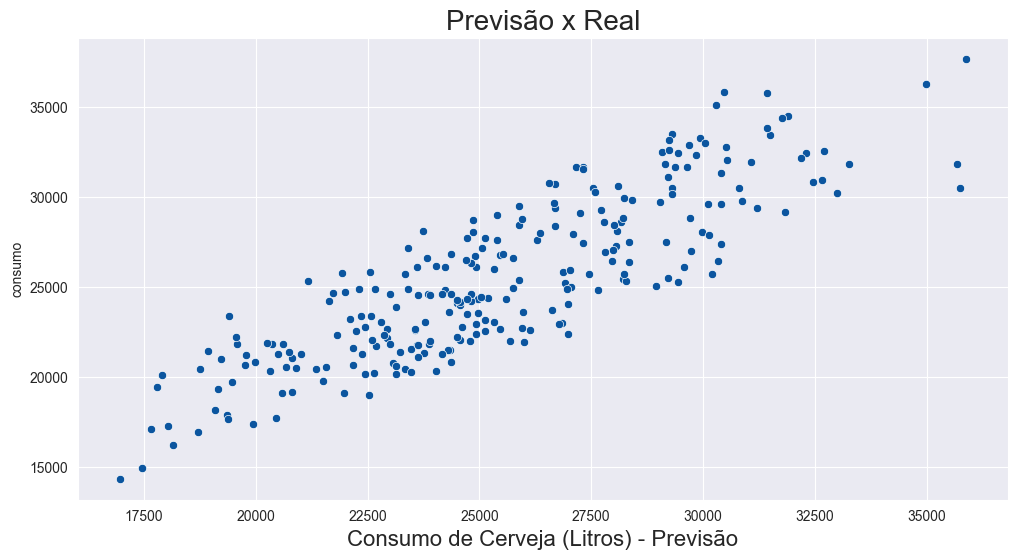

In [128]:
ax = sns.scatterplot(x=y_previsto_train, y=y_train)
ax.figure.set_size_inches(12,6)
ax.set_title('Previsão x Real', fontsize=20)
ax.set_xlabel('Consumo de Cerveja (Litros) - Previsão', fontsize=16)
ax.set_xlabel('Consumo de Cerveja (Litros) - Previsão', fontsize=16)
ax

### Obtendo os resíduos

In [129]:
residuo = y_train - y_previsto_train
residuo

195    3891.289113
344    4040.499863
288   -3010.078635
59    -1704.289133
220    4223.837237
          ...     
73     3186.229912
68     -739.805532
215    3010.236465
341    2588.394409
84     1631.868243
Name: consumo, Length: 255, dtype: float64

### Gráfico de dispersão entre valor estimado e resíduos

Método informal de verificação da hipótese de variância constante dos resíduos (homocedasticidade)

<Axes: title={'center': 'Resíduos X Previsão'}, xlabel='Consumo de Cerveja (Litros) - Previsão', ylabel='Residuos'>

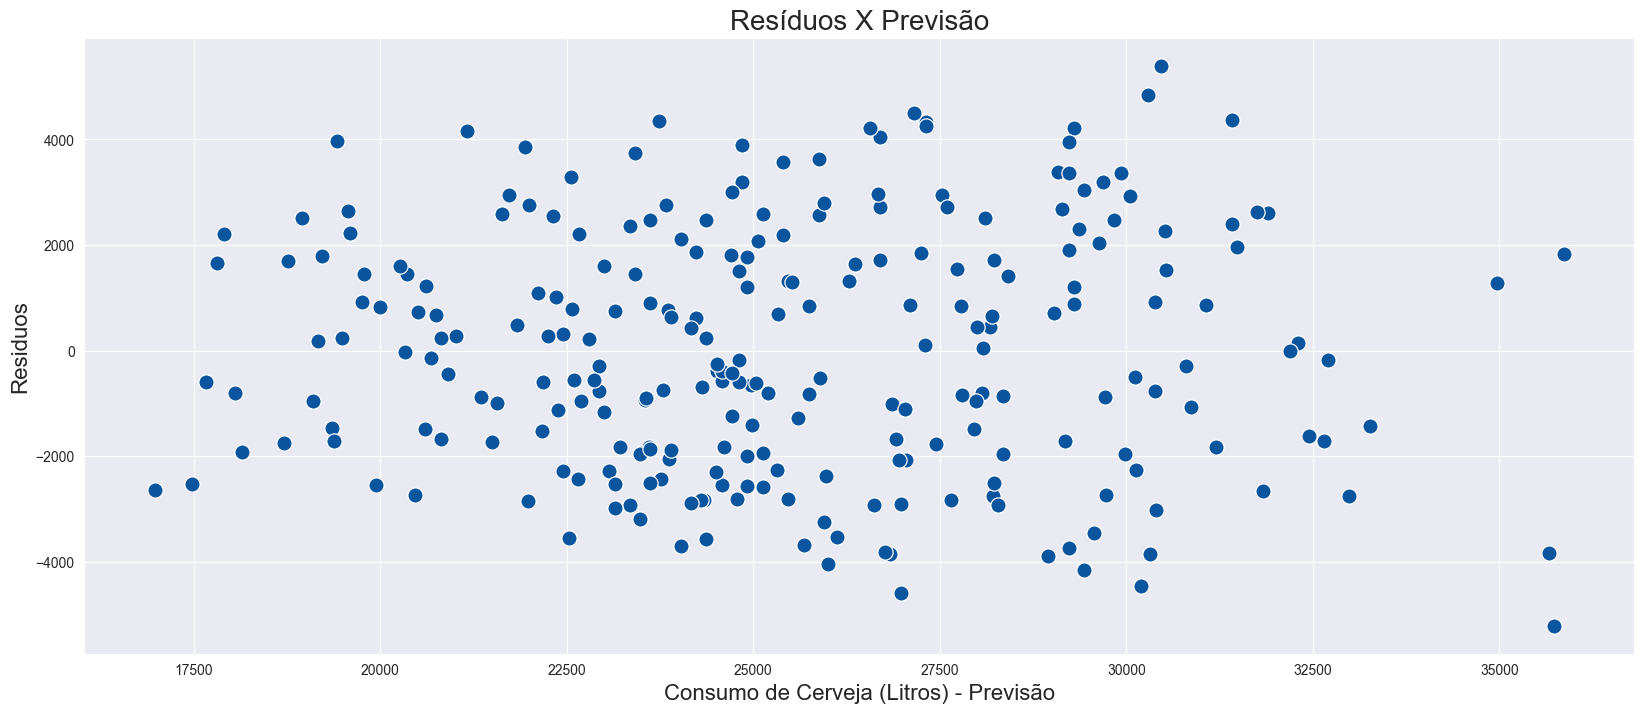

In [132]:
ax = sns.scatterplot(x=y_previsto_train, y=residuo, s=120)
ax.figure.set_size_inches(20,8)
ax.set_title('Resíduos X Previsão', fontsize=20)
ax.set_xlabel('Consumo de Cerveja (Litros) - Previsão', fontsize=16)
ax.set_ylabel('Residuos', fontsize=16)
ax

### Utilizando os resíduos ao quadrado

<Axes: title={'center': 'Resíduos² X Previsão'}, xlabel='Consumo de Cerveja (Litros) - Previsão', ylabel='Residuos²'>

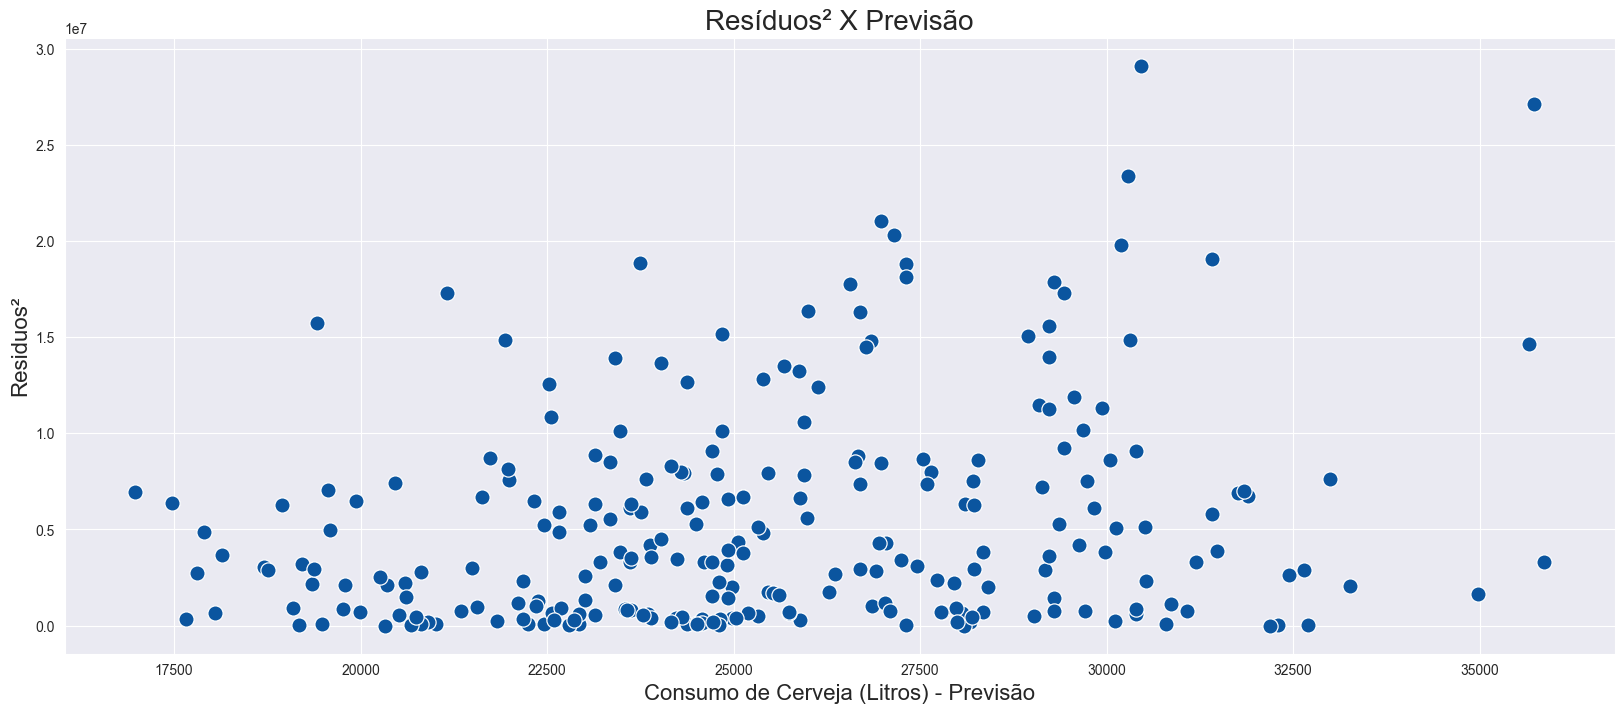

In [134]:
ax = sns.scatterplot(x=y_previsto_train, y=residuo**2, s=120)
ax.figure.set_size_inches(20,8)
ax.set_title('Resíduos² X Previsão', fontsize=20)
ax.set_xlabel('Consumo de Cerveja (Litros) - Previsão', fontsize=16)
ax.set_ylabel('Residuos²', fontsize=16)
ax

### Plotando a distribuição de frequências dos resíduos

<Axes: title={'center': 'Distribuição de frequências dos resíduos'}, xlabel='Litros', ylabel='Densidade'>

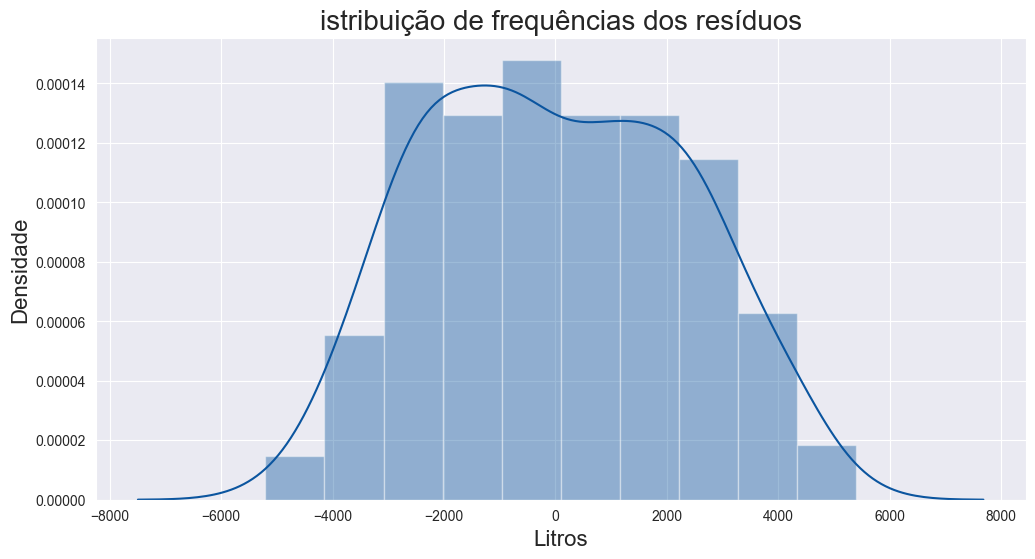

In [136]:
ax = sns.distplot(residuo)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de frequências dos resíduos', fontsize=20)
ax.set_xlabel('Litros', fontsize=16)
ax.set_ylabel('Densidade', fontsize=16)
ax

## <font style='font-size: 30px;'>Comparando Modelos</font>
<hr style='border: 2px Soli ;'>

### Estimando um novo modelo com a substituição da variável explicativa Temperatura Máxima pela Temperatuda Média

In [137]:
X2 = dados[['temp_media', 'chuva', 'fds']]

## Criando os datasets de treino e de teste

In [138]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, random_state=2811)

### Estimando modelo de regressão linear

In [140]:
modelo_2 = LinearRegression()
modelo_2.fit(X2_train, y2_train)

LinearRegression()

### Obtendo o coeficiente de determinação (R²) do novo modelo estimado e comparando com o resultado do modelo anterior

In [143]:
print('Modelo com Temp. Média')
print('R² = {}'.format(modelo_2.score(X2_train, y2_train).round(3)))

Modelo com Temp. Média
R² = 0.662


In [144]:
print('Modelo com Temp. Máxima')
print('R² = {}'.format(modelo.score(X_train, y_train).round(3)))

Modelo com Temp. Máxima
R² = 0.734


### Gerando previsões para os dados de teste

In [145]:
y_previsto = modelo.predict(X_test)
y_previsto_2 = modelo_2.predict(X2_test)

### Obtendo o coeficiente de determinação (R²) para as previsões dos dois modelos

In [147]:
print('Modelo com Temp. Média')
print('R² = {}'.format(metrics.r2_score(y2_test, y_previsto_2).round(3)))

Modelo com Temp. Média
R² = 0.658


In [148]:
print('Modelo com Temp. Máxima')
print('R² = {}'.format(metrics.r2_score(y_test, y_previsto).round(3)))

Modelo com Temp. Máxima
R² = 0.691


## Outras Métricas de Regressão
<hr style='border: 2px soli;'>

## Métricas da regressão
<hr>

fonte: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

Algumas estatísticas obtidas do modelo de regressão são muito úteis como critério de comparação entre modelos estimados e de seleção do melhor modelo, as principais métricas de regressão que o scikit-learn disponibiliza para modelos lineares são as seguintes:

### Erro Quadrático Médio

Média dos quadrados dos erros. Ajustes melhores apresentam $EQM$ mais baixo.

$$EQM(y, \hat{y}) = \frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2$$

### Raíz do Erro Quadrático Médio

Raíz quadrada da média dos quadrados dos erros. Ajustes melhores apresentam $\sqrt{EQM}$ mais baixo.

$$\sqrt{EQM(y, \hat{y})} = \sqrt{\frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}$$



### Obtendo métricas para o modelo com Temperatura Média

In [151]:
EQM_2 = metrics.mean_squared_error(y2_test, y_previsto_2).round(3)
REQM_2 = np.sqrt(metrics.mean_squared_error(y2_test,y_previsto_2).round(3))
R2_2 = metrics.r2_score(y2_test, y_previsto_2).round(3)

pd.DataFrame([EQM_2, REQM_2, R2_2], index=['EQM_2', 'REQM_2', 'R2_2'], columns=['Métricas'])

,Métricas
EQM_2,6.173392e+06
REQM_2,2.484631e+03
R2_2,6.580000e-01


### Obtendo métricas para o modelo com Temperatura Máxima

In [152]:
EQM = metrics.mean_squared_error(y_test, y_previsto).round(3)
REQM = np.sqrt(metrics.mean_squared_error(y_test,y_previsto).round(3))
R2 = metrics.r2_score(y_test, y_previsto).round(3)

pd.DataFrame([EQM, REQM, R2], index=['EQM', 'REQM', 'R2'], columns=['Métricas'])

,Métricas
EQM,5.471976e+06
REQM,2.339226e+03
R2,6.910000e-01


## Salvando e Carregando o Modelo Estimado
<hr style='border: 2px soli;'>

### Dados de entrada

In [153]:
X_test[0:1]

,temp_max,chuva,fds
5,30.5,12.2,0


In [154]:
entrada = X_test[0:1]

## Gerando previsão pontual

In [155]:
modelo.predict(entrada)[0]

26094.901775262017

## Criando um simulador simples

In [156]:
temp_max = 40
chuva = 12.2
fds = 0
entrada = [[temp_max, chuva, fds]]

print('{0:.2f} litros '.format(modelo.predict(entrada)[0]))

32599.90 litros 


### Salvando o modelo estimado

In [166]:
output = open('modelo_consumo_cerveja', 'wb')
pickle.dump(modelo, output)
output.close

TypeError: cannot pickle '_io.BufferedReader' object

### Em um novo notebook/projeto Python

<h4 style='color: blue; font-weight: normal'>In [1]:</h4>

```sh
import pickle

modelo = open('modelo_consumo_cerveja','rb')
lm_new = pickle.load(modelo)
modelo.close()

temp_max = 30.5
chuva = 12.2
fds = 0
entrada = [[temp_max, chuva, fds]]
print('{0:.2f} litros'.format(lm_new.predict(entrada)[0]))
```

<h4 style='color: red; font-weight: normal'>Out [1]:</h4>

```
26094.90 litros
```